# Gambler's Problem

In [115]:
stakes = [0,]*101
stakes[100] = 1
p_h = 0.5
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [116]:
# while True:
#     delta = 0
#     for capital in tqdm(range(1, 100)):
#         v = stakes[capital]
#         stakes[capital] = 0
#         for stake in range(1, min(capital, 100-capital)+1):
#             if capital+stake >= 100:
#                 stakes[capital] += p_h
#             else:
#                 stakes[capital] += p_h*stakes[capital+stake]
#             if capital-stake > 0:
#                 stakes[capital] += (1-p_h)*stakes[capital-stake]
#         stakes[capital]/=capital
#         delta = max(delta, abs(v-stakes[capital]))
#     if delta < 1e-6:
#         break

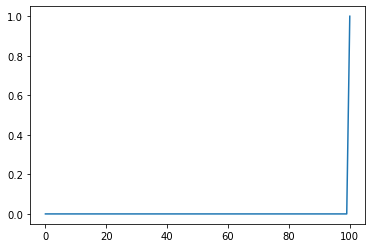

In [117]:
plt.plot(np.arange(101),stakes)

In [118]:
pi = [0,]*100

100%|███████████████████████████████████████| 99/99 [00:00<00:00, 222170.20it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 198867.86it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 264313.24it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 193222.94it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 224816.51it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 223485.52it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 288158.29it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 224209.56it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 132198.69it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 246138.76it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 277193.66it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 411940.57it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 311271.44it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 269109.59it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 234067.70it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 245411.40it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 370415.79it/s]


100%|███████████████████████████████████████| 99/99 [00:00<00:00, 310573.00it/s]


100%|████████████████████████████████████████| 99/99 [00:00<00:00, 33381.79it/s]


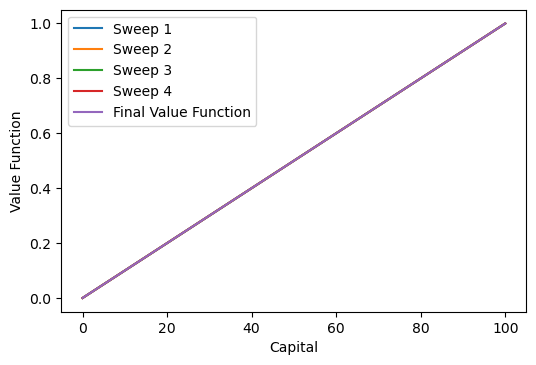

In [119]:
plt.figure(dpi=100)
i = 0
while True:
    stable = True
    for capital in tqdm(range(1, 100)):
        action = pi[capital]
        q_a = dict()
        for stake in range(1, min(capital, 100-capital)+1):
            q_a[stake] = 0
            if capital+stake >= 100:
                q_a[stake] += p_h
            else:
                q_a[stake] += p_h*stakes[capital+stake]
            if capital-stake > 0:
                q_a[stake] += (1-p_h)*stakes[capital-stake]
        pi[capital] = sorted(q_a.items(), key = lambda x : x[1], reverse=True)[0][0]
        if action != pi[capital]:
            stable = False
    if not stable:
        while True:
            delta = 0
            for capital in tqdm(range(1, 100)):
                v = stakes[capital]
                stakes[capital] = 0
                stake = pi[capital]
                if capital+stake >= 100:
                    stakes[capital] += p_h
                else:
                    stakes[capital] += p_h*stakes[capital+stake]
                if capital-stake > 0:
                    stakes[capital] += (1-p_h)*stakes[capital-stake]
                delta = max(delta, abs(v-stakes[capital]))
            if delta < 1e-6:
                break
        if i < 4:
            plt.plot(stakes)
            i+=1
    else:
        break
plt.plot(stakes)
plt.legend(['Sweep 1', 'Sweep 2', 'Sweep 3', 'Sweep 4', 'Final Value Function'])
plt.xlabel('Capital')
plt.ylabel('Value Function')
plt.savefig('../report/images/sweeps-0.5.png')
plt.show()

$p_h=0.4$

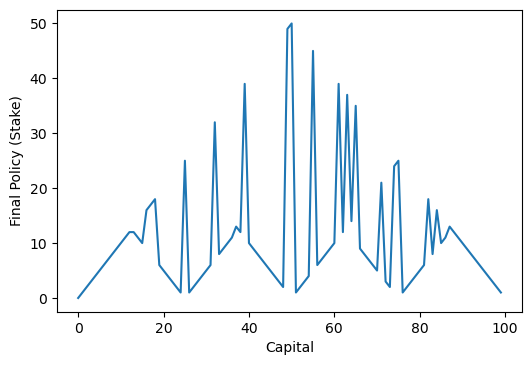

In [102]:
plt.figure(dpi=100)
plt.plot(np.arange(100), pi)
# plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
# plt.savefig('../report/images/pi-0.4.png')
plt.show()

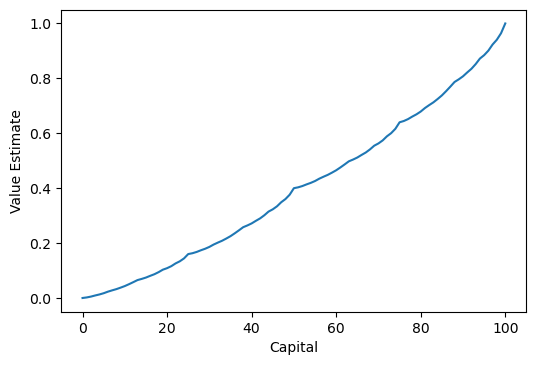

In [82]:
plt.figure(dpi=100)
plt.plot(np.arange(101), stakes)
# plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
# plt.savefig('../report/images/stakes-0.4.png')
plt.show()

$p_h=0.25$

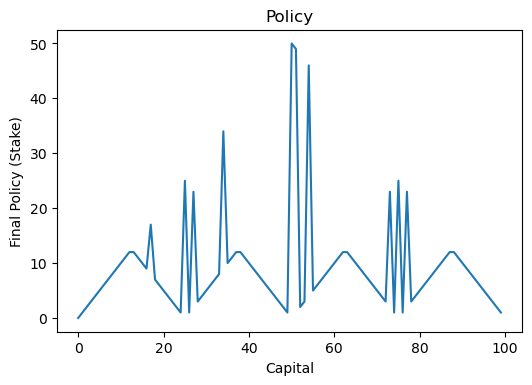

In [96]:
plt.figure(dpi=100)
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
# plt.savefig('../report/images/pi-0.25.png')
plt.show()

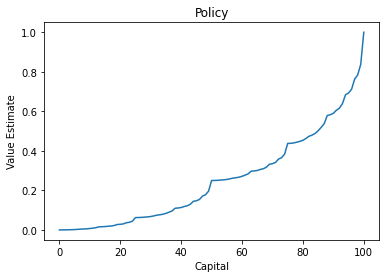

In [33]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

$p_h=0.55$

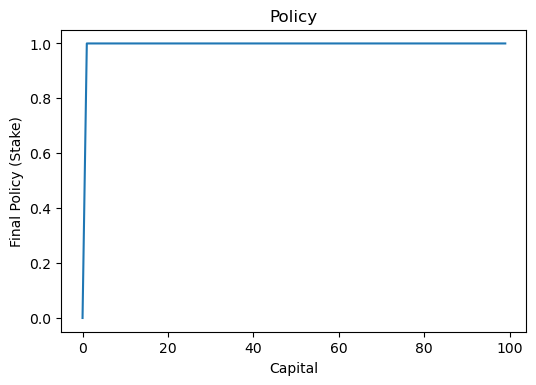

In [114]:
plt.figure(dpi=100)
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
# plt.savefig('../report/images/pi-0.55.png')
plt.show()

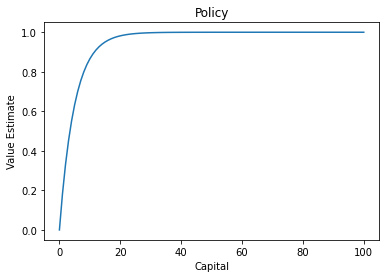

In [21]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

$p_h=0.5$

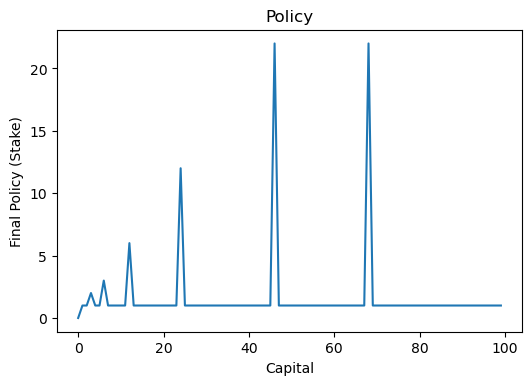

In [120]:
plt.figure(dpi=100)
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.savefig('../report/images/pi-0.5.png')
plt.show()

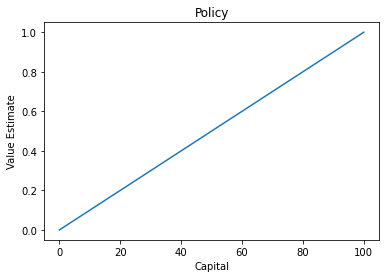

In [7]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

In [121]:
import random
game_over = False
capital = 50
while not game_over:
    stake = pi[capital]
    roll = random.random()
    print(capital, stake, end=' ')
    if roll < p_h:
        capital += stake
        print('Yay')
    else:
        capital -= stake
        print('Ooof')
    if capital <= 0:
        print('Lost')
        game_over = True
    elif capital >= 100:
        print('Won')
        game_over = True

50 1 Ooof
49 1 Ooof
48 1 Ooof
47 1 Yay
48 1 Yay
49 1 Ooof
48 1 Yay
49 1 Ooof
48 1 Yay
49 1 Yay
50 1 Yay
51 1 Ooof
50 1 Ooof
49 1 Ooof
48 1 Ooof
47 1 Yay
48 1 Yay
49 1 Yay
50 1 Yay
51 1 Yay
52 1 Yay
53 1 Ooof
52 1 Yay
53 1 Yay
54 1 Ooof
53 1 Yay
54 1 Yay
55 1 Ooof
54 1 Ooof
53 1 Ooof
52 1 Ooof
51 1 Yay
52 1 Ooof
51 1 Ooof
50 1 Yay
51 1 Yay
52 1 Ooof
51 1 Ooof
50 1 Yay
51 1 Yay
52 1 Yay
53 1 Yay
54 1 Yay
55 1 Ooof
54 1 Yay
55 1 Ooof
54 1 Yay
55 1 Ooof
54 1 Yay
55 1 Yay
56 1 Yay
57 1 Ooof
56 1 Yay
57 1 Ooof
56 1 Ooof
55 1 Yay
56 1 Yay
57 1 Ooof
56 1 Ooof
55 1 Ooof
54 1 Yay
55 1 Yay
56 1 Ooof
55 1 Ooof
54 1 Ooof
53 1 Ooof
52 1 Ooof
51 1 Ooof
50 1 Ooof
49 1 Ooof
48 1 Yay
49 1 Ooof
48 1 Yay
49 1 Yay
50 1 Yay
51 1 Ooof
50 1 Yay
51 1 Yay
52 1 Yay
53 1 Yay
54 1 Ooof
53 1 Yay
54 1 Ooof
53 1 Yay
54 1 Yay
55 1 Ooof
54 1 Yay
55 1 Ooof
54 1 Yay
55 1 Ooof
54 1 Ooof
53 1 Ooof
52 1 Ooof
51 1 Yay
52 1 Ooof
51 1 Ooof
50 1 Ooof
49 1 Yay
50 1 Yay
51 1 Yay
52 1 Ooof
51 1 Ooof
50 1 Yay
51 1 Yay
52 1 Ooof
51 